In [2]:
from google.colab import drive
import pandas as pd



file_path = 'healthdata.xlsx'
data = pd.read_excel(file_path)

data.head()


,Days:,Daily Steps,Standing Time,Rest Energy,Walk Speed,Distance Walk and Run,Floor Ascended,Gait Asymmetry,Double Support Time,Walking step Length:,Heart rate,Heart Rate Variability,Active Energy
0,2024-09-01,1968,NON,NON,"3,3-4,6","1,4 km",NON,0-1,"28,3 - 31,6",59 - 74,NON,NON,"70,6"
1,2024-09-02,2843,NON,NON,"3,1-4,8","2,1 km",5,0-29,"28,1 - 31,9",56 - 82,NON,NON,93
2,2024-09-03,1770,NON,NON,"2,8-4,2","1,3 km",1,0-0,"29,4 - 33,3",50 - 70,NON,NON,"46,4"
3,2024-09-04,2060,NON,NON,"3-4,7","1,5 km",3,0-5,"28,3 - 32,1",50 - 83,NON,NON,"57,2"
4,2024-09-05,4859,NON,NON,"2,8-5,4","3,4 km",1,0-4,"25,5 - 31,7",53 - 92,NON,NON,149


In [3]:

print("\nDescriptive Statistics for Numeric Data:")
print(data.describe())


print("\nDescriptive Statistics for Non-Numeric Data:")
print(data.describe(include='object'))


Descriptive Statistics for Numeric Data:
       Daily Steps
count    15.000000
mean   4382.333333
std    2503.654976
min    1770.000000
25%    2208.000000
50%    4074.000000
75%    6076.500000
max    9519.000000

Descriptive Statistics for Non-Numeric Data:
       Standing Time Rest Energy Walk Speed Distance Walk and Run  \
count             15          15         15                    15   
unique             6           7         15                    12   
top              NON         NON    3,3-4,6                1,4 km   
freq               9           9          1                     2   

        Floor Ascended Gait Asymmetry Double Support Time  \
count               15             15                  15   
unique               8             13                  15   
top                  4            0-0         28,3 - 31,6   
freq                 4              2                   1   

       Walking step Length: Heart rate Heart Rate Variability Active Energy  
count      

In [4]:
print("\nCorrelation Matrix:")
print(data.corr())


Correlation Matrix:
             Daily Steps
Daily Steps          1.0


<ipython-input-4-8aece1b9d4bc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


In [5]:
import pandas as pd
from tabulate import tabulate

file_path = 'healthdata.xlsx'
data = pd.read_excel(file_path)


print(tabulate(data, headers='keys', tablefmt='pretty', showindex=False))


+---------------------+-------------+---------------+-------------+------------+-----------------------+----------------+----------------+---------------------+----------------------+------------+------------------------+---------------+
|        Days:        | Daily Steps | Standing Time | Rest Energy | Walk Speed | Distance Walk and Run | Floor Ascended | Gait Asymmetry | Double Support Time | Walking step Length: | Heart rate | Heart Rate Variability | Active Energy |
+---------------------+-------------+---------------+-------------+------------+-----------------------+----------------+----------------+---------------------+----------------------+------------+------------------------+---------------+
| 2024-09-01 00:00:00 |    1968     |      NON      |     NON     |  3,3-4,6   |        1,4 km         |      NON       |      0-1       |     28,3 - 31,6     |       59 - 74        |    NON     |          NON           |     70,6      |
| 2024-09-02 00:00:00 |    2843     |      NON  

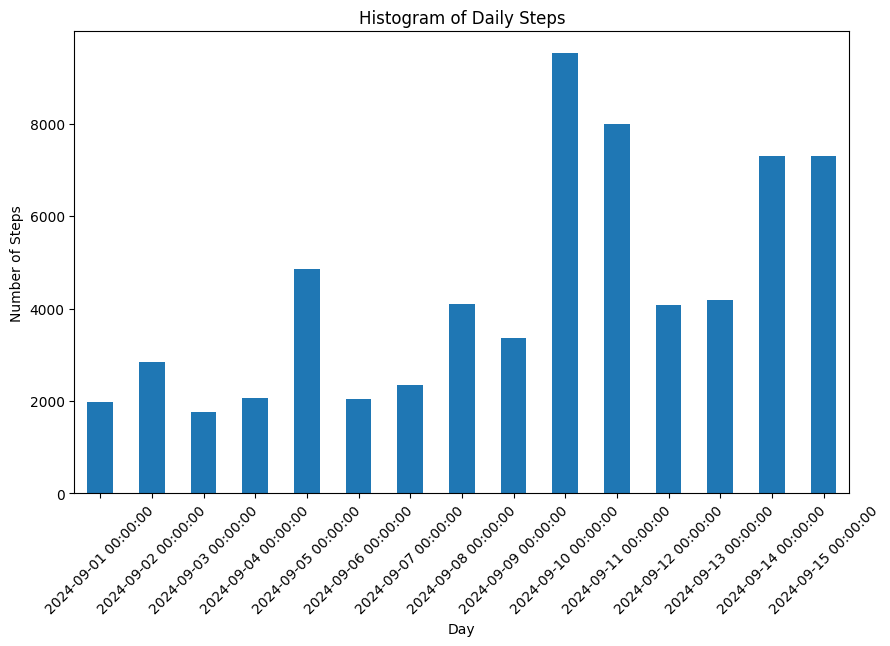

In [6]:
import matplotlib.pyplot as plt


data['Days:'] = pd.to_datetime(data['Days:'])

data.set_index('Days:', inplace=True)

plt.figure(figsize=(10, 6))
data['Daily Steps'].plot(kind='bar')
plt.title('Histogram of Daily Steps')
plt.xlabel('Day')
plt.ylabel('Number of Steps')
plt.xticks(rotation=45)
plt.show()


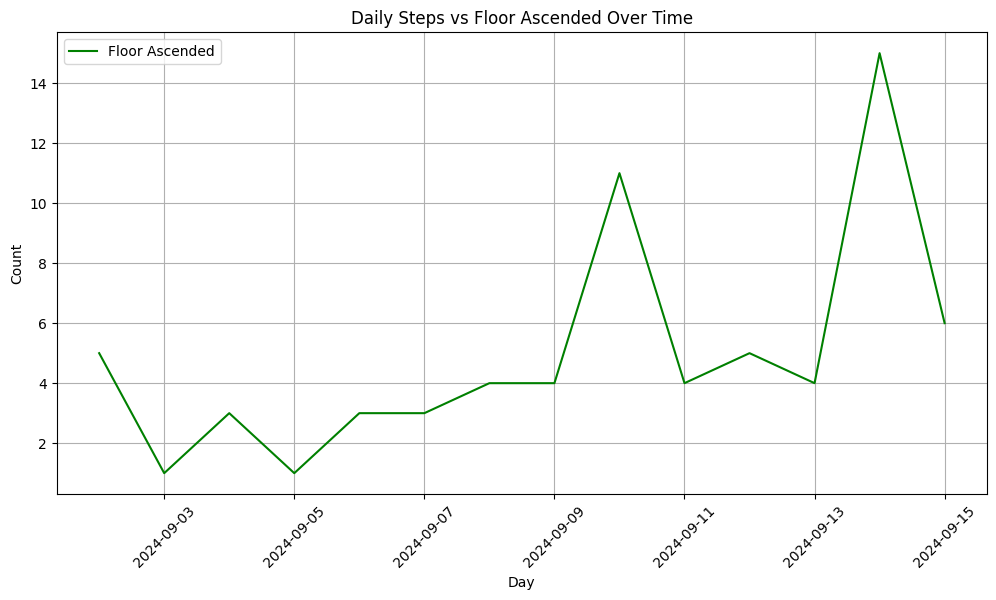

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path = 'healthdata.xlsx'
data = pd.read_excel(file_path)

data['Days:'] = pd.to_datetime(data['Days:'])

data.set_index('Days:', inplace=True)

data['Floor Ascended'] = data['Floor Ascended'].replace('NON', np.nan).astype(float)

plt.figure(figsize=(12, 6))

plt.plot(data.index, data['Floor Ascended'], label='Floor Ascended', color='green')

plt.title('Daily Steps vs Floor Ascended Over Time')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


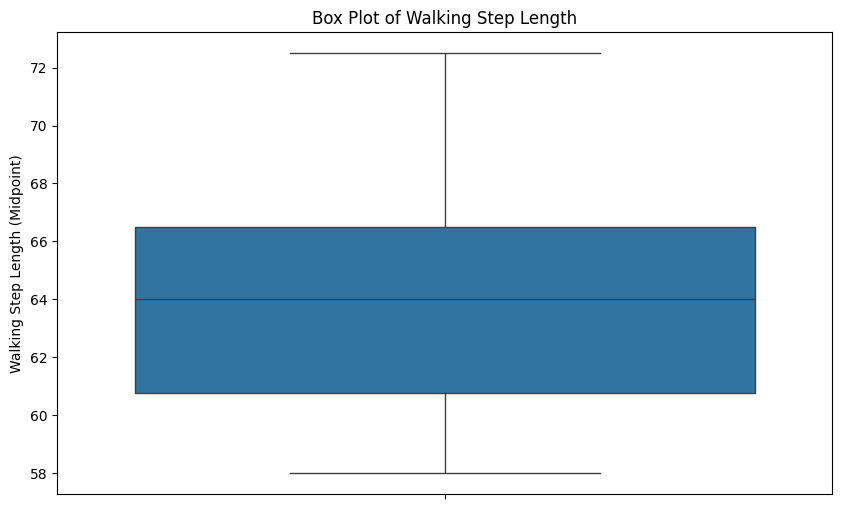

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

file_path = 'healthdata.xlsx'
data = pd.read_excel(file_path)


def range_to_midpoint(range_str):
    if range_str == 'NON':
        return None
    lower, upper = range_str.split('-')
    return (float(lower) + float(upper)) / 2


data['Walking Step Length Mid'] = data['Walking step Length:'].apply(range_to_midpoint)

# Now create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Walking Step Length Mid'])
plt.title('Box Plot of Walking Step Length')
plt.ylabel('Walking Step Length (Midpoint)')
plt.show()


<ipython-input-9-08e100f64934>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f")


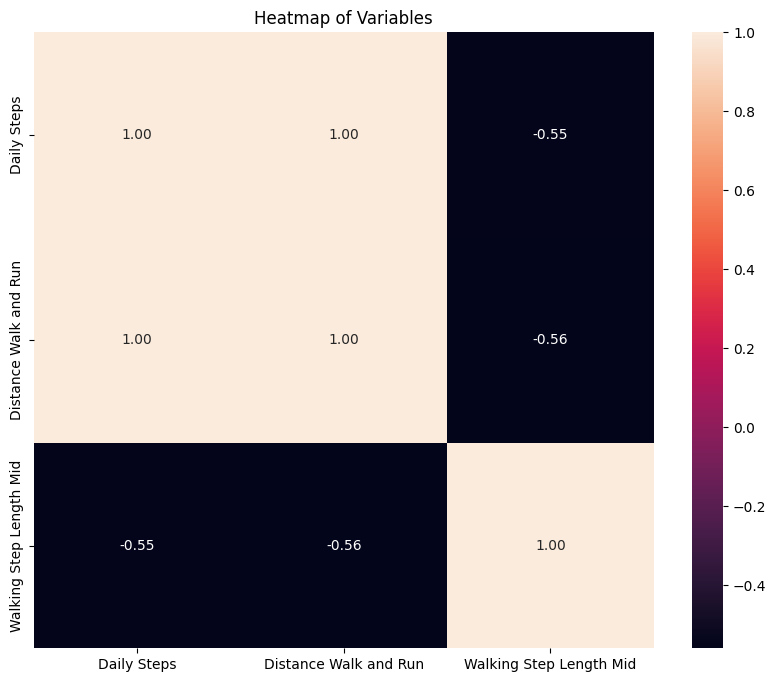

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'healthdata.xlsx'
data = pd.read_excel(file_path)

def range_to_midpoint(range_str):
    if range_str == 'NON':
        return None
    lower, upper = range_str.split('-')
    return (float(lower.replace(',', '.').strip()) + float(upper.replace(',', '.').strip())) / 2

data['Walking Step Length Mid'] = data['Walking step Length:'].apply(range_to_midpoint)

data['Distance Walk and Run'] = data['Distance Walk and Run'].str.replace(' km', '').str.replace(',', '.').astype(float)


plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title("Heatmap of Variables")
plt.show()


In [22]:
#linear regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

file_path = 'healthdata.xlsx'
data = pd.read_excel(file_path)

data['Active Energy'] = pd.to_numeric(data['Active Energy'], errors='coerce')
data.dropna(subset=['Active Energy'], inplace=True)

data['Daily Steps'] = pd.to_numeric(data['Daily Steps'], errors='coerce')
data['Distance Walk and Run'] = data['Distance Walk and Run'].str.replace(' km', '').str.replace(',', '.').astype(float)
data['Floor Ascended'] = pd.to_numeric(data['Floor Ascended'], errors='coerce')
data['Gait Asymmetry'] = pd.to_numeric(data['Gait Asymmetry'], errors='coerce')


In [23]:

features = data[['Daily Steps', 'Distance Walk and Run', 'Floor Ascended', 'Gait Asymmetry']]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, data['Active Energy'], test_size=0.2, random_state=42)



In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 15064.411639435984


In [25]:
#RandomForestRegressor

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

file_path = 'healthdata.xlsx'
data = pd.read_excel(file_path)

data['Active Energy'] = pd.to_numeric(data['Active Energy'], errors='coerce')
data.dropna(subset=['Active Energy'], inplace=True)

data['Daily Steps'] = pd.to_numeric(data['Daily Steps'], errors='coerce')
data['Distance Walk and Run'] = data['Distance Walk and Run'].str.replace(' km', '').str.replace(',', '.').astype(float)
data['Floor Ascended'] = pd.to_numeric(data['Floor Ascended'], errors='coerce')
data['Gait Asymmetry'] = pd.to_numeric(data['Gait Asymmetry'], errors='coerce')

features = data[['Daily Steps', 'Distance Walk and Run', 'Floor Ascended', 'Gait Asymmetry']]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, data['Active Energy'], test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 11715.8714
